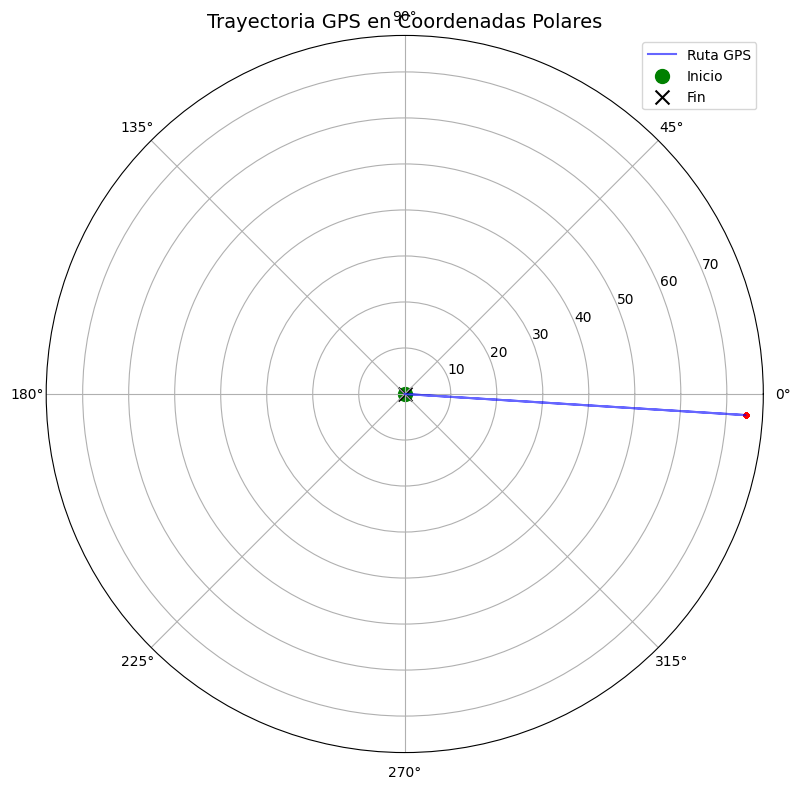

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Función mejorada para convertir DMS a decimal
def dms_to_decimal(dms_str):
    if isinstance(dms_str, (int, float)):
        return float(dms_str)

    # Buscar si hay dirección cardinal
    direction = None
    match_dir = re.search(r'[NSEW]$', dms_str.strip().upper())
    if match_dir:
        direction = match_dir.group()
        dms_str = dms_str.strip().replace(direction, '').strip()

    # Eliminar símbolos de grados, minutos, segundos
    dms_str = dms_str.replace('°', ' ').replace("'", '').replace('"', '')
    parts = re.split(r'\s+', dms_str)

    try:
        degrees = float(parts[0])
        minutes = float(parts[1]) if len(parts) > 1 else 0
        seconds = float(parts[2]) if len(parts) > 2 else 0
    except (ValueError, IndexError):
        raise ValueError(f"Formato inválido en coordenada: {dms_str}")

    decimal = degrees + minutes / 60 + seconds / 3600

    # Aplicar signo según dirección
    if direction in ['S', 'W']:
        decimal *= -1

    return decimal


# 1. Leer el archivo
archivo_excel = '/content/drive/MyDrive/pandasclase/datos_gps.xlsx'
datos = pd.read_excel(archivo_excel, usecols=["latitud", "lontugitud"])

# 2. Limpiar datos nulos o ceros
datos_limpios = datos.dropna(subset=['latitud', 'lontugitud']).copy()
datos_limpios = datos_limpios[
    (datos_limpios['latitud'] != 0) & (datos_limpios['lontugitud'] != 0)
]


datos_limpios['latitud_decimal'] = datos_limpios['latitud'].apply(dms_to_decimal)
datos_limpios['lontugitud_decimal'] = datos_limpios['lontugitud'].apply(dms_to_decimal)

lat = datos_limpios['latitud_decimal'].values
lon = datos_limpios['lontugitud_decimal'].values


lat0, lon0 = lat[0], lon[0]
dy = lat - lat0
dx = lon - lon0
theta = np.arctan2(dy, dx)
r = np.sqrt(dx**2 + dy**2)

# 6. Graficar
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='polar')

ax.plot(theta, r, color='blue', alpha=0.6, linewidth=1.5, label='Ruta GPS')
ax.scatter(theta, r, c='red', s=10, alpha=0.6)

# Marcar inicio y fin
ax.scatter(theta[0], r[0], c='green', s=100, marker='o', label='Inicio')
ax.scatter(theta[-1], r[-1], c='black', s=100, marker='x', label='Fin')

# Detalles
ax.set_title('Trayectoria GPS en Coordenadas Polares', fontsize=14)
ax.legend(loc='upper right')
ax.grid(True)

plt.tight_layout()
plt.show()


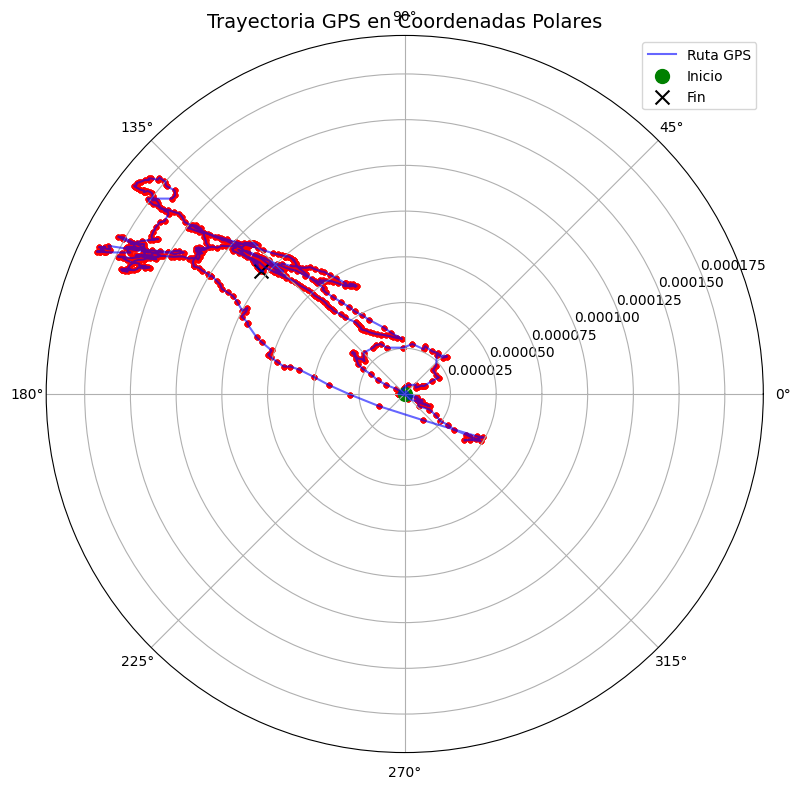

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Función mejorada para convertir DMS a decimal
def dms_to_decimal(dms_str):
    if isinstance(dms_str, (int, float)):
        return float(dms_str)

    # Buscar si hay dirección cardinal
    direction = None
    match_dir = re.search(r'[NSEW]$', dms_str.strip().upper())
    if match_dir:
        direction = match_dir.group()
        dms_str = dms_str.strip().replace(direction, '').strip()

    # Eliminar símbolos de grados, minutos, segundos
    dms_str = dms_str.replace('°', ' ').replace("'", '').replace('"', '')
    parts = re.split(r'\s+', dms_str)

    try:
        degrees = float(parts[0])
        minutes = float(parts[1]) if len(parts) > 1 else 0
        seconds = float(parts[2]) if len(parts) > 2 else 0
    except (ValueError, IndexError):
        raise ValueError(f"Formato inválido en coordenada: {dms_str}")

    decimal = degrees + minutes / 60 + seconds / 3600

    # Aplicar signo según dirección
    if direction in ['S', 'W']:
        decimal *= -1

    return decimal


# 1. Leer el archivo
archivo_excel = '/content/drive/MyDrive/pandasclase/gps_datost2.xlsx'
datos = pd.read_excel(archivo_excel, usecols=["latitud", "lontugitud"])

# 2. Limpiar datos nulos o ceros
datos_limpios = datos.dropna(subset=['latitud', 'lontugitud']).copy()
datos_limpios = datos_limpios[
    (datos_limpios['latitud'] != 0) & (datos_limpios['lontugitud'] != 0)
]


datos_limpios['latitud_decimal'] = datos_limpios['latitud'].apply(dms_to_decimal)
datos_limpios['lontugitud_decimal'] = datos_limpios['lontugitud'].apply(dms_to_decimal)

lat = datos_limpios['latitud_decimal'].values
lon = datos_limpios['lontugitud_decimal'].values


lat0, lon0 = lat[0], lon[0]
dy = lat - lat0
dx = lon - lon0
theta = np.arctan2(dy, dx)
r = np.sqrt(dx**2 + dy**2)

# 6. Graficar
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='polar')

ax.plot(theta, r, color='blue', alpha=0.6, linewidth=1.5, label='Ruta GPS')
ax.scatter(theta, r, c='red', s=10, alpha=0.6)

# Marcar inicio y fin
ax.scatter(theta[0], r[0], c='green', s=100, marker='o', label='Inicio')
ax.scatter(theta[-1], r[-1], c='black', s=100, marker='x', label='Fin')

# Detalles
ax.set_title('Trayectoria GPS en Coordenadas Polares', fontsize=14)
ax.legend(loc='upper right')
ax.grid(True)

plt.tight_layout()
plt.show()


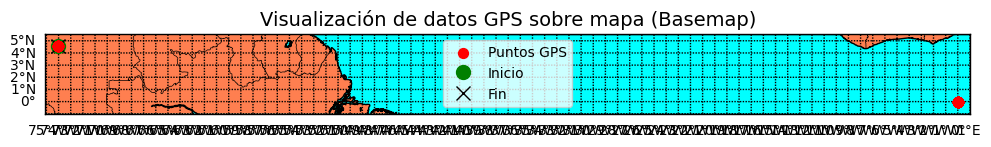

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import re

# Función para convertir coordenadas DMS a grados decimales
def dms_to_decimal(dms_str):
    if isinstance(dms_str, (float, int)):
        return float(dms_str)

    direction = None
    match_dir = re.search(r'[NSEW]$', dms_str.strip().upper())
    if match_dir:
        direction = match_dir.group()
        dms_str = dms_str.replace(direction, '').strip()

    dms_str = dms_str.replace('°', ' ').replace("'", '').replace('"', '')
    parts = re.split(r'\s+', dms_str)

    try:
        degrees = float(parts[0])
        minutes = float(parts[1]) if len(parts) > 1 else 0
        seconds = float(parts[2]) if len(parts) > 2 else 0
    except:
        raise ValueError(f"Formato DMS inválido: {dms_str}")

    decimal = degrees + minutes / 60 + seconds / 3600
    if direction in ['S', 'W']:
        decimal *= -1
    return decimal

# Leer el archivo Excel
archivo_excel = '/content/drive/MyDrive/pandasclase/datos_gps.xlsx'
df = pd.read_excel(archivo_excel, usecols=['latitud', 'lontugitud'])
df = df.dropna(subset=['latitud', 'lontugitud']).copy()

# Convertir coordenadas a grados decimales
df['lat'] = df['latitud'].apply(dms_to_decimal)
df['lon'] = df['lontugitud'].apply(dms_to_decimal)

# Extraer coordenadas
latitudes = df['lat'].tolist()
longitudes = df['lon'].tolist()

# Crear el mapa con proyección Mercator
plt.figure(figsize=(10, 8))
m = Basemap(
    projection='merc',
    llcrnrlat=min(latitudes) - 1, urcrnrlat=max(latitudes) + 1,
    llcrnrlon=min(longitudes) - 1, urcrnrlon=max(longitudes) + 1,
    resolution='i'
)

# Dibujar el fondo del mapa
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral', lake_color='aqua')
m.drawparallels(np.arange(-90., 91., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 1.), labels=[0,0,0,1], fontsize=10)

# Convertir coordenadas geográficas a coordenadas del mapa
x, y = m(longitudes, latitudes)

# Dibujar los puntos GPS
m.scatter(x, y, marker='o', color='red', s=50, zorder=5, label='Puntos GPS')

# Marcar el punto inicial y final
m.plot(x[0], y[0], 'go', markersize=10, label='Inicio')
m.plot(x[-1], y[-1], 'kx', markersize=10, label='Fin')

# Título y leyenda
plt.title('Visualización de datos GPS sobre mapa (Basemap)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


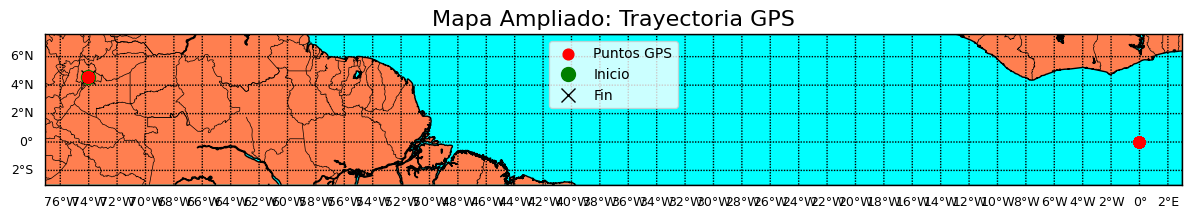

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import re

# Función para convertir coordenadas DMS a grados decimales
def dms_to_decimal(dms_str):
    if isinstance(dms_str, (float, int)):
        return float(dms_str)

    direction = None
    match_dir = re.search(r'[NSEW]$', dms_str.strip().upper())
    if match_dir:
        direction = match_dir.group()
        dms_str = dms_str.replace(direction, '').strip()

    dms_str = dms_str.replace('°', ' ').replace("'", '').replace('"', '')
    parts = re.split(r'\s+', dms_str)

    try:
        degrees = float(parts[0])
        minutes = float(parts[1]) if len(parts) > 1 else 0
        seconds = float(parts[2]) if len(parts) > 2 else 0
    except:
        raise ValueError(f"Formato DMS inválido: {dms_str}")

    decimal = degrees + minutes / 60 + seconds / 3600
    if direction in ['S', 'W']:
        decimal *= -1
    return decimal

# Leer el archivo Excel
archivo_excel = '/content/drive/MyDrive/pandasclase/datos_gps.xlsx'
df = pd.read_excel(archivo_excel, usecols=['latitud', 'lontugitud'])
df = df.dropna(subset=['latitud', 'lontugitud']).copy()

# Convertir coordenadas a grados decimales
df['lat'] = df['latitud'].apply(dms_to_decimal)
df['lon'] = df['lontugitud'].apply(dms_to_decimal)

latitudes = df['lat'].tolist()
longitudes = df['lon'].tolist()

# Calcular márgenes amplios para mostrar más del mapa
lat_margin = 3  # grados extra de margen
lon_margin = 3

lat_min = min(latitudes) - lat_margin
lat_max = max(latitudes) + lat_margin
lon_min = min(longitudes) - lon_margin
lon_max = max(longitudes) + lon_margin

# Crear el mapa
plt.figure(figsize=(12, 10))  # Mapa más grande
m = Basemap(
    projection='merc',
    llcrnrlat=lat_min,
    urcrnrlat=lat_max,
    llcrnrlon=lon_min,
    urcrnrlon=lon_max,
    resolution='i'  # Resolución intermedia
)

# Fondo del mapa
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral', lake_color='aqua')
m.drawparallels(np.arange(-90., 91., 2.), labels=[1,0,0,0], fontsize=9)
m.drawmeridians(np.arange(-180., 181., 2.), labels=[0,0,0,1], fontsize=9)

# Convertir coordenadas y graficar puntos
x, y = m(longitudes, latitudes)
m.scatter(x, y, marker='o', color='red', s=60, zorder=5, label='Puntos GPS')

# Marcar inicio y fin
m.plot(x[0], y[0], 'go', markersize=10, label='Inicio')
m.plot(x[-1], y[-1], 'kx', markersize=10, label='Fin')

# Título y leyenda
plt.title('Mapa Ampliado: Trayectoria GPS', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


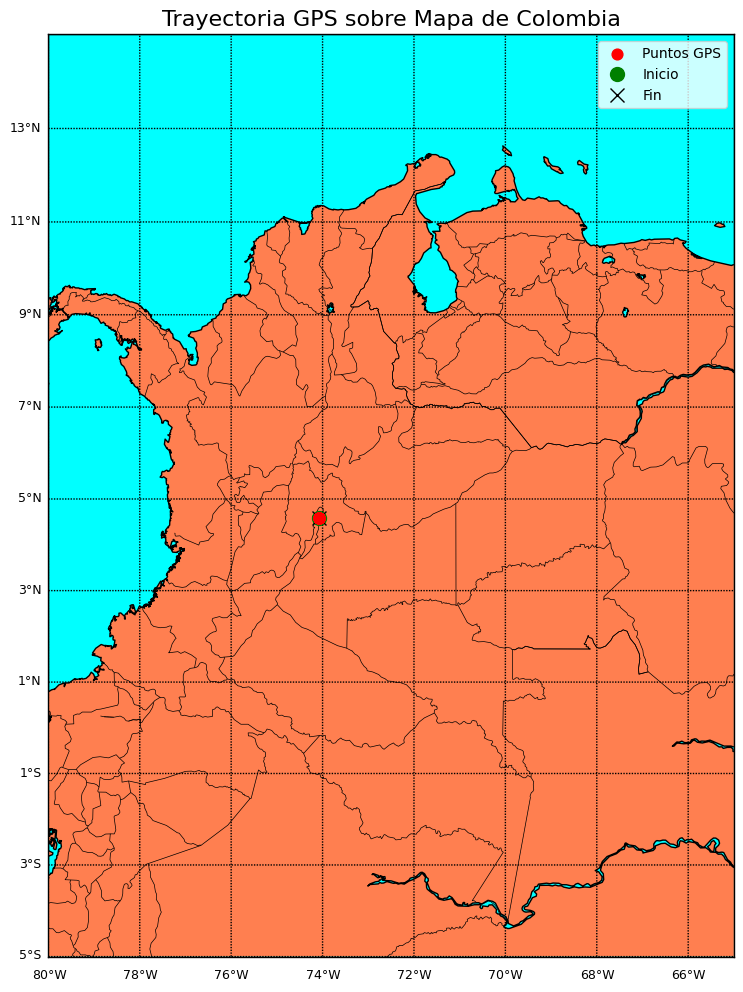

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import re

# Función para convertir DMS a decimal
def dms_to_decimal(dms_str):
    if isinstance(dms_str, (float, int)):
        return float(dms_str)

    direction = None
    match_dir = re.search(r'[NSEW]$', dms_str.strip().upper())
    if match_dir:
        direction = match_dir.group()
        dms_str = dms_str.replace(direction, '').strip()

    dms_str = dms_str.replace('°', ' ').replace("'", '').replace('"', '')
    parts = re.split(r'\s+', dms_str)

    try:
        degrees = float(parts[0])
        minutes = float(parts[1]) if len(parts) > 1 else 0
        seconds = float(parts[2]) if len(parts) > 2 else 0
    except:
        raise ValueError(f"Formato DMS inválido: {dms_str}")

    decimal = degrees + minutes / 60 + seconds / 3600
    if direction in ['S', 'W']:
        decimal *= -1
    return decimal

# Leer el archivo Excel
archivo_excel = '/content/drive/MyDrive/pandasclase/datos_gps.xlsx'
df = pd.read_excel(archivo_excel, usecols=['latitud', 'lontugitud'])
df = df.dropna(subset=['latitud', 'lontugitud']).copy()

# Convertir coordenadas
df['lat'] = df['latitud'].apply(dms_to_decimal)
df['lon'] = df['lontugitud'].apply(dms_to_decimal)

latitudes = df['lat'].tolist()
longitudes = df['lon'].tolist()

# Crear el mapa centrado en Colombia
plt.figure(figsize=(12, 10))
m = Basemap(
    projection='merc',
    llcrnrlat=-5,    # Límite inferior (latitud)
    urcrnrlat=15,    # Límite superior
    llcrnrlon=-80,   # Límite izquierdo (longitud)
    urcrnrlon=-65,   # Límite derecho
    resolution='i'
)

# Fondo del mapa
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral', lake_color='aqua')
m.drawparallels(np.arange(-5, 16, 2), labels=[1,0,0,0], fontsize=9)
m.drawmeridians(np.arange(-80, -64, 2), labels=[0,0,0,1], fontsize=9)

# Convertir coordenadas a mapa
x, y = m(longitudes, latitudes)
m.scatter(x, y, marker='o', color='red', s=60, zorder=5, label='Puntos GPS')

# Marcar inicio y fin
m.plot(x[0], y[0], 'go', markersize=10, label='Inicio')
m.plot(x[-1], y[-1], 'kx', markersize=10, label='Fin')

# Título y leyenda
plt.title('Trayectoria GPS sobre Mapa de Colombia', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
!pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 62.0 MB/s eta 0:00:00
